In [46]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px # Imported for GANNT chart creation.
import matplotlib.offsetbox as offsetbox
import matplotlib.image as image
from matplotlib.text import Text
warnings.filterwarnings('ignore')
from wordcloud import WordCloud # for tweets word cloud
import re


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput


import warnings
# warnings.filterwarnings('ignore')




In [45]:
#pip install skforecast

# 1.1 Project Management

This Project follows the CRISP-DM Project Management Principles.
In order to demonstarate this a GANNT chart using Plotly's express libary (px)

This initial chart will be compared to a completed one at the end of the project

In [47]:
CA2_Gantt_Chart = pd.DataFrame([
    dict(Task="GitHub Configuration", Start='2023-05-07', Finish='2023-05-08', Percentage_Completed=100),
    dict(Task="Get twitter dataset", Start='2023-05-09', Finish='2023-05-12', Percentage_Completed=100),
    dict(Task="Distriubuted Data Processing Enviornment", Start='2023-05-13', Finish='2023-05-14',  Percentage_Completed=100),
    dict(Task="Store data in SQL/NoSQL Database", Start='2023-05-15', Finish='2023-05-16',Percentage_Completed=100),
    dict(Task="Follow up analysis on on the output data", Start='2023-05-17', Finish='2023-05-18', Percentage_Completed=100),
    dict(Task="Testing Strategy - YCSB", Start='2023-05-19', Finish='2023-05-20', Percentage_Completed=100),
    dict(Task="Sentiment Extraction", Start='2023-05-20', Finish='2023-05-21', Percentage_Completed=100),
    dict(Task="Time Series forecasting", Start='2023-05-21', Finish='2023-05-21', Percentage_Completed=100),
    dict(Task="Interactive Dashboard Setup", Start='2023-05-21', Finish='2023-05-22', Percentage_Completed=100),
    dict(Task="Report", Start='2023-05-23', Finish='2023-05-24', Percentage_Completed=100),
    dict(Task="Submission", Start='2023-05-25', Finish='2023-05-26',Percentage_Completed=100),
])

fig = px.timeline(CA2_Gantt_Chart, x_start="Start", x_end="Finish", y="Task", color="Percentage_Completed")
# Title was not centred so used the below to centre to title layout.
fig.update_layout(title_text=" Initial CA2 GANNT Chart", title_x=0.5)
fig.show()

This is a placeholder for the final GANNT Chart for the project. This will completed on completion date.

In [52]:
CA2_Gantt_Chart_Final = pd.DataFrame([
    dict(Task="GitHub Configuration", Start='2023-05-07', Finish='2023-05-08', Percentage_Completed=100),
    dict(Task="Get twitter dataset", Start='2023-05-09', Finish='2023-05-19', Percentage_Completed=100),
    dict(Task="Distriubuted Data Processing Enviornment", Start='2023-05-20', Finish='2023-05-24',  Percentage_Completed=100),
    dict(Task="Store data in SQL/NoSQL Database", Start='2023-05-23', Finish='2023-05-24',Percentage_Completed=100),
    dict(Task="Follow up analysis on on the output data", Start='2023-05-22', Finish='2023-05-24', Percentage_Completed=100),
    dict(Task="Testing Strategy - YCSB", Start='2023-05-23', Finish='2023-05-24', Percentage_Completed=100),
    dict(Task="Sentiment Extraction", Start='2023-05-24', Finish='2023-05-25', Percentage_Completed=100),
    dict(Task="Time Series forecasting", Start='2023-05-24', Finish='2023-05-25', Percentage_Completed=100),
    dict(Task="Interactive Dashboard Setup", Start='2023-05-24', Finish='2023-05-25', Percentage_Completed=100),
    dict(Task="Report", Start='2023-05-25', Finish='2023-05-25', Percentage_Completed=100),
    dict(Task="Submission", Start='2023-05-25', Finish='2023-05-26',Percentage_Completed=100),
])

fig2 = px.timeline(CA2_Gantt_Chart_Final, x_start="Start", x_end="Finish", y="Task", color="Percentage_Completed")
# Title was not centred so used the below to centre to title layout.
fig2.update_layout(title_text=" Final CA2 GANNT Chart", title_x=0.5)
fig2.show()

# 1.2 Data retrieval

## 1.2.1 Assignment links

This section I am testing some possible datasets to be used for the project

Both of the below required an API key, which I currently do not have have

https://datascienceparichay.com/article/get-data-from-twitter-api-in-python-step-by-step-guide/    

https://www.toptal.com/apache/apache-spark-streaming-twitter
    

This was attempted, but server was too slow, almost 1.2 days per file download ( 1 months data )
https://archive.org/details/twitterstream?sort=-publicdate


Due to slowness in the download from the server, I attempted to download a mon


## 1.2.2 Alternative Data sources

Another possible dataset was found on Kaggle.com : 
    
https://www.kaggle.com/datasets/prathamsharma123/farmers-protest-tweets-dataset-csv?resource=download
    
    
Now lets take a quick look at if this data will be sufficient.

For the assignment, 1 year of tweets is required on a certain topic

# 2.0 EDA

In [ ]:
# reading in the dataset downloaded from Kaggle, which is stored in my assignment folder
test_df = pd.read_csv('/Users/adevane/Documents/AdvDA&BigData-FinalCA/MSC_DA_CA2v4/tweets.csv')

In [ ]:
test_df.head()# showing first 5 rows of dataset

tweetUrl  \
0  https://twitter.com/ShashiRajbhar6/status/1376...   
1  https://twitter.com/kaursuk06272818/status/137...   
2  https://twitter.com/kaursuk06272818/status/137...   
3  https://twitter.com/SukhdevSingh_/status/13767...   
4  https://twitter.com/Davidmu66668113/status/137...   

                        date  \
0  2021-03-30 03:33:46+00:00   
1  2021-03-30 03:33:23+00:00   
2  2021-03-30 03:31:00+00:00   
3  2021-03-30 03:30:45+00:00   
4  2021-03-30 03:30:30+00:00   

                                     renderedContent       tweetId  \
0                       Support 👇\n\n#FarmersProtest  1.376739e+18   
1  Supporting farmers means supporting our countr...  1.376739e+18   
2  Support farmers if you are related to food #St...  1.376739e+18   
3  #StopHateAgainstFarmers support #FarmersProtes...  1.376739e+18   
4  You hate farmers I hate you, \nif you love the...  1.376739e+18   

         userId  replyCount  retweetCount  likeCount  quoteCount  \
0  1.015970e+18           0             0          0           0   
1  1.332937e+18           0             0          0           0   
2  1.332937e+18           0             0          0           0   
3  1.308357e+18           0             1          3           0   
4  1.357312e+18           0             0          1           0   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   

                                               media  retweetedTweet  \
0                                                NaN             NaN   
1  [{'previewUrl': 'https://pbs.twimg.com/media/E...             NaN   
2  [{'previewUrl': 'https://pbs.twimg.com/media/E...             NaN   
3                                                NaN             NaN   
4                                                NaN             NaN   

  quotedTweet mentionedUsers  
0         NaN            NaN  
1         NaN            NaN  
2         NaN            NaN  
3         NaN            NaN  
4         NaN            NaN

In [ ]:
test_df_users = pd.read_csv('/Users/adevane/Documents/AdvDA&BigData-FinalCA/MSC_DA_CA2v4/users.csv')

In [ ]:
test_df_users.shape# simple print of the total rows and columns in the dataset

(235660, 19)

In [ ]:
test_df.shape# simple print of the total rows and columns in the dataset

#looks usuable , 14 unqiue columns, with over 1 million rows ( tweets )

(1084452, 14)

In [ ]:
merged_data = pd.merge(test_df, test_df_users, how='inner', on='userId')


In [ ]:
merged_data.head()

tweetUrl  \
0  https://twitter.com/SukhdevSingh_/status/13767...   
1  https://twitter.com/SukhdevSingh_/status/13767...   
2  https://twitter.com/SukhdevSingh_/status/13767...   
3  https://twitter.com/SukhdevSingh_/status/13767...   
4  https://twitter.com/SukhdevSingh_/status/13767...   

                        date  \
0  2021-03-30 03:30:45+00:00   
1  2021-03-30 03:23:37+00:00   
2  2021-03-30 03:18:53+00:00   
3  2021-03-30 03:15:33+00:00   
4  2021-03-30 02:52:01+00:00   

                                     renderedContent       tweetId  \
0  #StopHateAgainstFarmers support #FarmersProtes...  1.376739e+18   
1  #StopHateAgainstFarmers #FarmersProtest is aga...  1.376737e+18   
2  #StopHateAgainstFarmers #FarmersProtest has en...  1.376736e+18   
3  #StopHateAgainstFarmers\nFarming is an occupat...  1.376735e+18   
4  No one is patriot like a farmer. He feeds the ...  1.376729e+18   

         userId  replyCount  retweetCount  likeCount  quoteCount  \
0  1.308357e+18           0             1          3           0   
1  1.308357e+18           0             8          5           0   
2  1.308357e+18           0            12          9           0   
3  1.308357e+18           0             2          2           0   
4  1.308357e+18           0             5          3           0   

                                              source  ... statusesCount  \
0  <a href="http://twitter.com/download/android" ...  ...          5573   
1  <a href="http://twitter.com/download/android" ...  ...          5573   
2  <a href="http://twitter.com/download/android" ...  ...          5573   
3  <a href="http://twitter.com/download/android" ...  ...          5573   
4  <a href="http://twitter.com/download/android" ...  ...          5573   

   favouritesCount listedCount mediaCount       location protected linkUrl  \
0             9222           4        628  Punjab, India     False     NaN   
1             9222           4        628  Punjab, India     False     NaN   
2             9222           4        628  Punjab, India     False     NaN   
3             9222           4        628  Punjab, India     False     NaN   
4             9222           4        628  Punjab, India     False     NaN   

                                     profileImageUrl  \
0  https://pbs.twimg.com/profile_images/139755214...   
1  https://pbs.twimg.com/profile_images/139755214...   
2  https://pbs.twimg.com/profile_images/139755214...   
3  https://pbs.twimg.com/profile_images/139755214...   
4  https://pbs.twimg.com/profile_images/139755214...   

                                    profileBannerUrl  \
0  https://pbs.twimg.com/profile_banners/13083566...   
1  https://pbs.twimg.com/profile_banners/13083566...   
2  https://pbs.twimg.com/profile_banners/13083566...   
3  https://pbs.twimg.com/profile_banners/13083566...   
4  https://pbs.twimg.com/profile_banners/13083566...   

                          profileUrl  
0  https://twitter.com/SukhdevSingh_  
1  https://twitter.com/SukhdevSingh_  
2  https://twitter.com/SukhdevSingh_  
3  https://twitter.com/SukhdevSingh_  
4  https://twitter.com/SukhdevSingh_  

[5 rows x 32 columns]

In [ ]:
merged_data.shape

(2524900, 32)

In [ ]:
print(merged_data.columns)


Index(['tweetUrl', 'date', 'renderedContent', 'tweetId', 'userId',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'source',
       'media', 'retweetedTweet', 'quotedTweet', 'mentionedUsers', 'username',
       'displayname', 'rawDescription', 'descriptionUrls', 'verified',
       'created', 'followersCount', 'friendsCount', 'statusesCount',
       'favouritesCount', 'listedCount', 'mediaCount', 'location', 'protected',
       'linkUrl', 'profileImageUrl', 'profileBannerUrl', 'profileUrl'],
      dtype='object')


In [ ]:
columns_to_keep = ['date', 'renderedContent', 'username', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount']
trimmed_df = merged_data[columns_to_keep]

In [ ]:
trimmed_df.head()

date  \
0  2021-03-30 03:30:45+00:00   
1  2021-03-30 03:23:37+00:00   
2  2021-03-30 03:18:53+00:00   
3  2021-03-30 03:15:33+00:00   
4  2021-03-30 02:52:01+00:00   

                                     renderedContent       username  \
0  #StopHateAgainstFarmers support #FarmersProtes...  SukhdevSingh_   
1  #StopHateAgainstFarmers #FarmersProtest is aga...  SukhdevSingh_   
2  #StopHateAgainstFarmers #FarmersProtest has en...  SukhdevSingh_   
3  #StopHateAgainstFarmers\nFarming is an occupat...  SukhdevSingh_   
4  No one is patriot like a farmer. He feeds the ...  SukhdevSingh_   

   replyCount  retweetCount  likeCount  quoteCount  
0           0             1          3           0  
1           0             8          5           0  
2           0            12          9           0  
3           0             2          2           0  
4           0             5          3           0

In [ ]:
trimmed_df['date'] = pd.to_datetime(trimmed_df['date'])

From the results , It seems between December 2020 and Febraury 2021, the majority of the traffic for the hashtag occured

"The 2020–2021 Indian farmers' protest was a protest against three farm acts that were passed by the Parliament of India in September 2020."

https://en.wikipedia.org/wiki/2020%E2%80%932021_Indian_farmers%27_protest

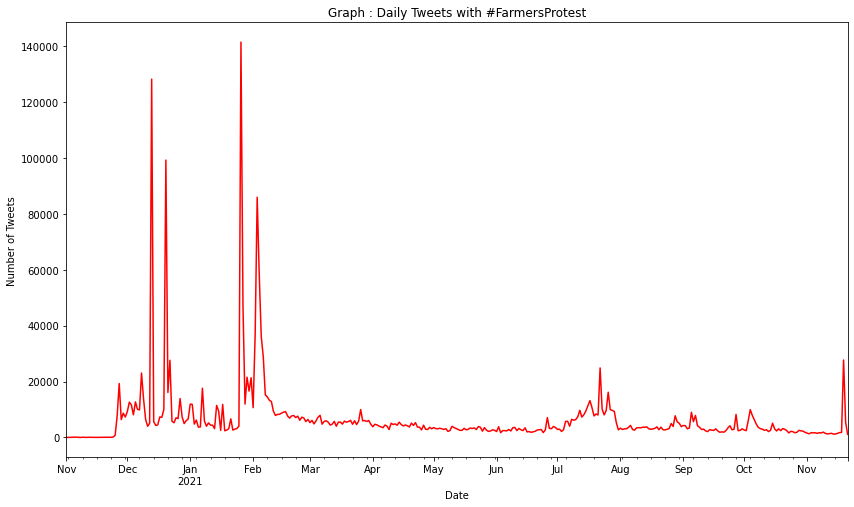

In [ ]:
df_daily = trimmed_df.set_index('date').resample('D').size()
df_daily.plot(kind='line', figsize=(14, 8), color='red')
plt.title('Graph : Daily Tweets with #FarmersProtest')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

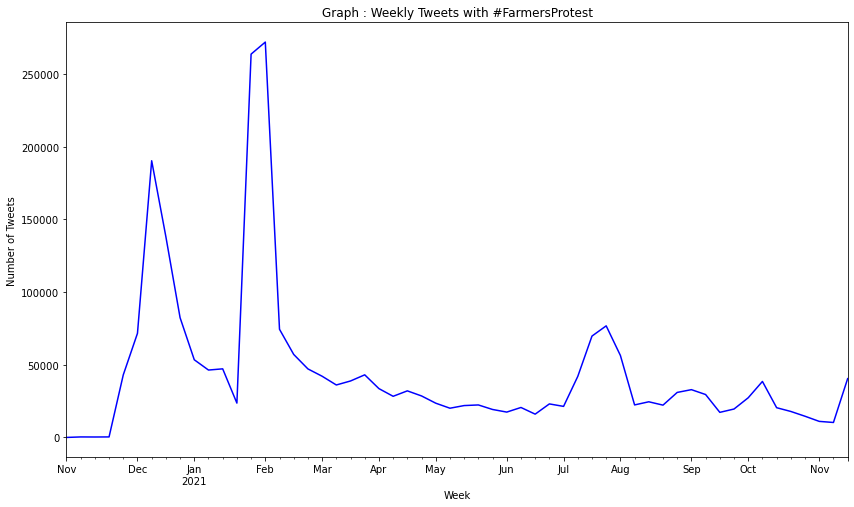

In [ ]:
df_weekly = trimmed_df.set_index('date').resample('W').size()
df_weekly.plot(kind='line', figsize=(14, 8), color='blue')
plt.title('Graph : Weekly Tweets with #FarmersProtest')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.show()

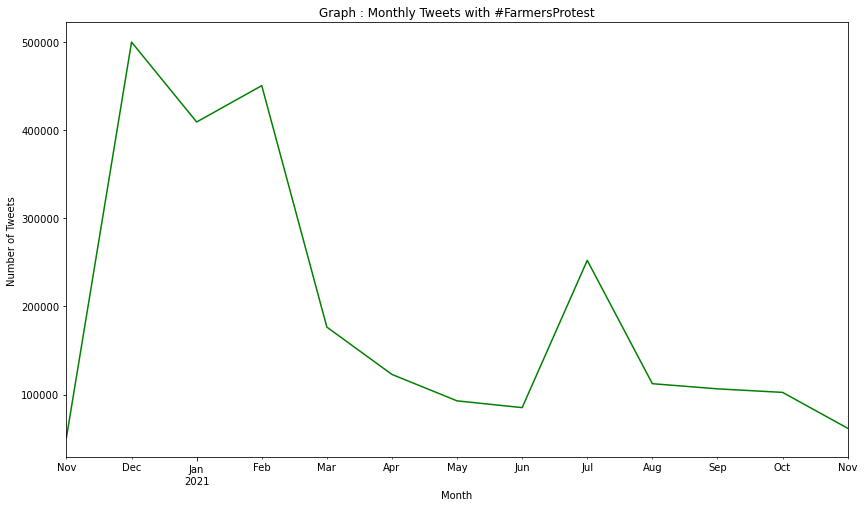

In [ ]:
df_monthly = trimmed_df.set_index('date').resample('M').size()
df_monthly.plot(kind='line', figsize=(14, 8), color='green')
plt.title('Graph : Monthly Tweets with #FarmersProtest')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2524900 entries, 0 to 2524899
Data columns (total 7 columns):
 #   Column           Dtype              
---  ------           -----              
 0   date             datetime64[ns, UTC]
 1   renderedContent  object             
 2   username         object             
 3   replyCount       int64              
 4   retweetCount     int64              
 5   likeCount        int64              
 6   quoteCount       int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 154.1+ MB


In [ ]:
most_popular_day = trimmed_df['date'].dt.day_name().mode().values[0]
print('Most Popular Day for #FarmersProtests Tweets:', most_popular_day)



Most Popular Day for #FarmersProtests Tweets: Sunday


In [ ]:
most_popular_month = trimmed_df['date'].dt.month_name().mode().values[0]
print('Most Popular Month for #FarmersProtests Tweets:', most_popular_month)



Most Popular Month for #FarmersProtests Tweets: December


In [ ]:
most_popular_time = trimmed_df['date'].dt.strftime('%H').mode().values[0]
print('Most Popular Time for #FarmersProtests Tweets:', most_popular_time)

Most Popular Time for #FarmersProtests Tweets: 12


In [ ]:
most_liked_tweet_index = trimmed_df['likeCount'].idxmax()
most_liked_tweet = trimmed_df.loc[most_liked_tweet_index, 'renderedContent']
most_likes = trimmed_df.loc[most_liked_tweet_index, 'likeCount']
most_liked_username = trimmed_df.loc[most_liked_tweet_index, 'username']
print('-------Most Liked Tweet--------')
print('Author of tweet:    ', most_liked_username)
print('Toal number of likes:', most_likes)
print(most_liked_tweet)
print()
print('------------------------------')

-------Most Liked Tweet--------
Author of tweet:     rihanna
Toal number of likes: 944307
why aren’t we talking about this?! #FarmersProtest cnn.com/2021/02/01/asi…

------------------------------


In [ ]:
most_retweeted_tweet_index = trimmed_df['retweetCount'].idxmax()
most_retweeted_tweet = trimmed_df.loc[most_liked_tweet_index, 'renderedContent']
most_retweeted = trimmed_df.loc[most_liked_tweet_index, 'retweetCount']
most_retweeted_username = trimmed_df.loc[most_liked_tweet_index, 'username']
print('-------Most Retweeted Tweet--------')
print('Author of tweet:    ', most_retweeted_username)
print('Toal number of retweets:', most_retweeted)
print(most_retweeted_tweet)
print()
print('------------------------------')

-------Most Retweeted Tweet--------
Author of tweet:     rihanna
Toal number of retweets: 315547
why aren’t we talking about this?! #FarmersProtest cnn.com/2021/02/01/asi…

------------------------------


# 3.0 Sentiment Analysis

In this section, I will work on the sentiment analysis task of this project

Many datasets already include a rating or score, or ploarity score. This #FarmersProtest dataset needed this to be created

For this I am using the textBlob  API for asssitance with common natural language processing (NLP) tasks 

In [ ]:
#pip install textblob
from textblob import TextBlob  #Pre trained Sentiment analysis libary

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity



Tweets in renderedContent are given a plarity score by applying the pre trained sentiment from TextBlob

In [ ]:
trimmed_df['polarity_score'] = trimmed_df['renderedContent'].apply(get_sentiment)

Then we create the labels for the sentiments, based off the score it has been given

Them use the lambda function to append the labels to the trimmed_df 

In [ ]:
trimmed_df['polarity_result'] = trimmed_df['polarity_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))



In [ ]:
trimmed_df.head()

date  \
0 2021-03-30 03:30:45+00:00   
1 2021-03-30 03:23:37+00:00   
2 2021-03-30 03:18:53+00:00   
3 2021-03-30 03:15:33+00:00   
4 2021-03-30 02:52:01+00:00   

                                     renderedContent       username  \
0  #StopHateAgainstFarmers support #FarmersProtes...  SukhdevSingh_   
1  #StopHateAgainstFarmers #FarmersProtest is aga...  SukhdevSingh_   
2  #StopHateAgainstFarmers #FarmersProtest has en...  SukhdevSingh_   
3  #StopHateAgainstFarmers\nFarming is an occupat...  SukhdevSingh_   
4  No one is patriot like a farmer. He feeds the ...  SukhdevSingh_   

   replyCount  retweetCount  likeCount  quoteCount  polarity_score  \
0           0             1          3           0        0.400000   
1           0             8          5           0        0.000000   
2           0            12          9           0        0.000000   
3           0             2          2           0        0.035714   
4           0             5          3           0        0.000000   

  polarity_result  
0        positive  
1         neutral  
2         neutral  
3        positive  
4         neutral

Text blob follows the follwoing procedure

    0 indicates a neutral sentiment
    
    Greater than 0 as far up as 1 indicates a positive sentiment
    
    Less than 0 as far down as -1 indicates a negative sentiment

Lets create a quick sentimentDF for further work shortly

In [ ]:
sentimentDF = trimmed_df[['renderedContent', 'polarity_score', 'polarity_result']].copy()

In [ ]:
sentimentDF.head(10)

renderedContent  polarity_score  \
0  #StopHateAgainstFarmers support #FarmersProtes...        0.400000   
1  #StopHateAgainstFarmers #FarmersProtest is aga...        0.000000   
2  #StopHateAgainstFarmers #FarmersProtest has en...        0.000000   
3  #StopHateAgainstFarmers\nFarming is an occupat...        0.035714   
4  No one is patriot like a farmer. He feeds the ...        0.000000   
5  Repeal farm laws instead of misguiding and spr...        0.000000   
6  Formers are major part of Indian society and e...        0.062500   
7  Farmers need your support.\n#BurnFarmLawsOnHol...        0.000000   
8   True #FarmersProtest twitter.com/parmarmaninder…        0.350000   
9  Modi says he has participated in the movement ...        0.183333   

  polarity_result  
0        positive  
1         neutral  
2         neutral  
3        positive  
4         neutral  
5         neutral  
6        positive  
7         neutral  
8        positive  
9        positive

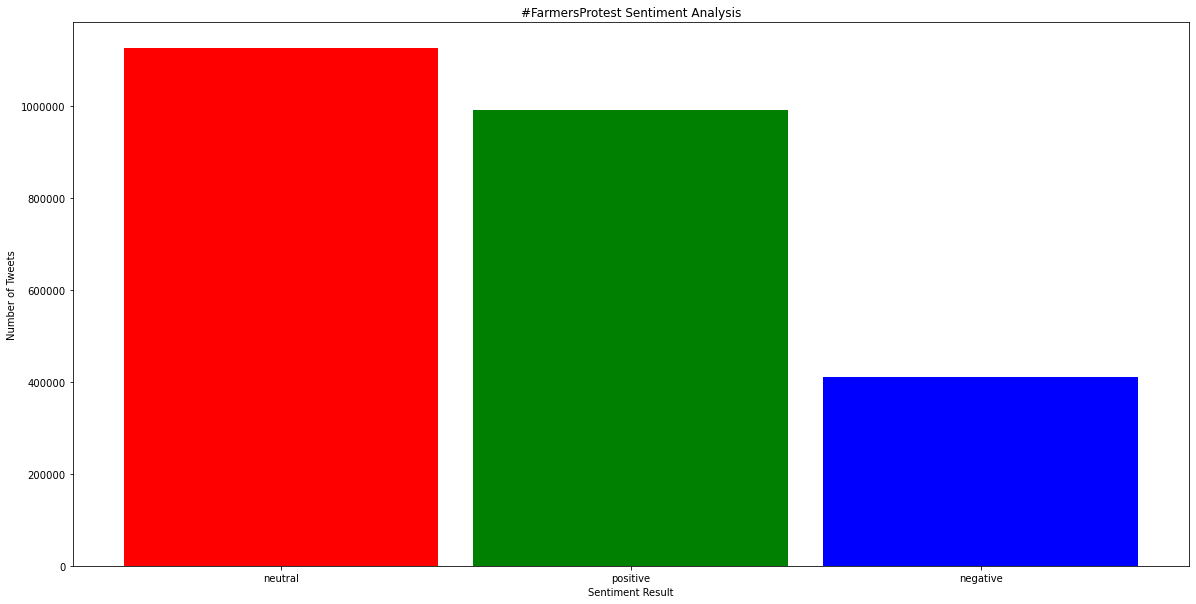

In [ ]:
# Simply counting count of polarity results
sentiment_counts = sentimentDF['polarity_result'].value_counts()

# Plot customization
colors = ['red', 'green', 'blue']
width = 0.9

# Create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, width=width)
plt.xlabel('Sentiment Result')
plt.ylabel('Number of Tweets')
plt.title('#FarmersProtest Sentiment Analysis')

# Original plots showed scientific notation, added the the set_scientific to false
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.rcParams['figure.figsize'] = [20, 10]

plt.show()


Next lets create some wordclouds, for 2 parts. Currennt dataset and dataset without new lines and hashtags

Having used this in work a lot, I decided to use some regex here to remove links( https ), hashtags and newlines

In [ ]:
cleaned_df = sentimentDF.assign(cleaned_text=sentimentDF['renderedContent'].replace(r'#[\w_]+|\n|https?://\S+', '', regex=True))

Looks to have worked, added new column below with cleaned_text column added

In [ ]:
cleaned_df.head()

renderedContent  polarity_score  \
0  #StopHateAgainstFarmers support #FarmersProtes...        0.400000   
1  #StopHateAgainstFarmers #FarmersProtest is aga...        0.000000   
2  #StopHateAgainstFarmers #FarmersProtest has en...        0.000000   
3  #StopHateAgainstFarmers\nFarming is an occupat...        0.035714   
4  No one is patriot like a farmer. He feeds the ...        0.000000   

  polarity_result                                       cleaned_text  
0        positive   support  by pressurising got. to accept farme...  
1         neutral    is against Farm Laws, not against any religi...  
2         neutral    has encouraged and established religious har...  
3        positive  Farming is an occupation. It is not limited to...  
4         neutral  No one is patriot like a farmer. He feeds the ...

Now for the word Clouds, I am doing this to see if there is much difference in the clouds when all the above is removed

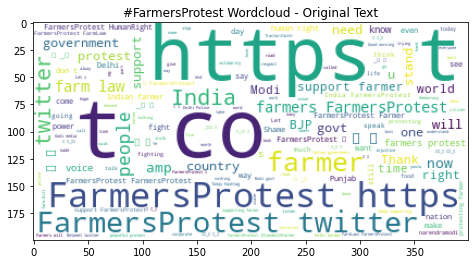

In [ ]:
tweet_text = " ".join(list(trimmed_df['renderedContent'].value_counts().index))
wc = WordCloud(background_color="white")
wordcloud = wc.generate(tweet_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.title("#FarmersProtest Wordcloud - Original Text")
plt.show()

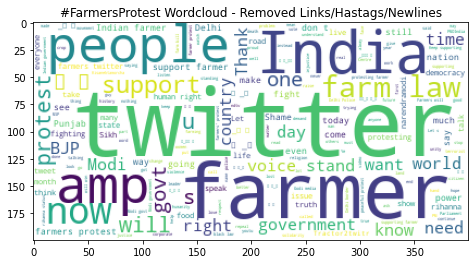

In [ ]:
tweet_text = " ".join(list(cleaned_df['cleaned_text'].value_counts().index))
wc = WordCloud(background_color="white")
wordcloud = wc.generate(tweet_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.title("#FarmersProtest Wordcloud - Removed Links/Hastags/Newlines")
plt.show()

Although we have cleaned the dataset, there is a lot of similar words

# 4.0 Time Series Analysis

Firstly, lets prepare the data. Currently I have all tweets , with indiducal time stamps stored

For TSA, i will need these in polarity score per day

Lets do this by creating a dataframe with mean/average score per day

In [ ]:
tsa_df = trimmed_df.groupby(pd.Grouper(key='date', freq='D')).agg({'polarity_score': 'mean'})


Here I am calcualting the mean using the aggregate function of my polarity score column and outputting it to a dataframe suitable for Time Series Analysis (tsa_df)

In [ ]:
tsa_df.head()

polarity_score
date                                     
2020-11-01 00:00:00+00:00        0.111111
2020-11-02 00:00:00+00:00        0.031818
2020-11-03 00:00:00+00:00        0.000391
2020-11-04 00:00:00+00:00        0.046436
2020-11-05 00:00:00+00:00        0.070549

Date column is still in incorrect format, lets change it to Year Month Day, as this is required later on

Assignemnt says we need to predict 7 days(d) , 1 month(m) and 1 year(y)

In [ ]:
tsa_df.index = tsa_df.index.strftime('%Y-%m-%d')

In [ ]:
tsa_df.head()

polarity_score
date                      
2020-11-01        0.111111
2020-11-02        0.031818
2020-11-03        0.000391
2020-11-04        0.046436
2020-11-05        0.070549

tsa_df now in required format for later on

To check if I have continous values for every day, lets plot the data just to check

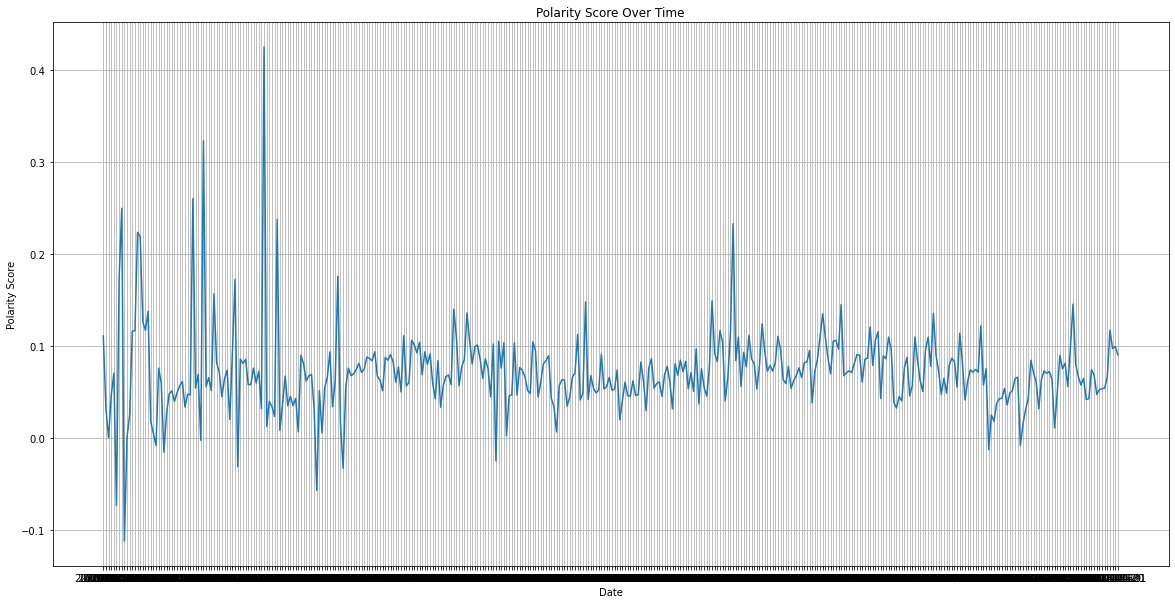

In [ ]:
plt.plot(tsa_df.index, tsa_df['polarity_score'])
plt.xlabel('Date')
plt.ylabel('Polarity Score')
plt.title('Polarity Score Over Time')
plt.grid(True)
plt.show()

Looks like no missing values, double confirm by checking for null values

In [ ]:
null_values = tsa_df['polarity_score'].isnull().sum()

if null_values > 0:
    print("Data not ready for Time Series Analysis. Found", null_values, "null values in 'polarity_score' column.")
else:
    print("Data is ready for Time Series Analysis.")


Data is ready for Time Series Analysis.


At this point, I swapped enviornments. I ran into lots of issues my MAC M1 Chip and tensor flow.

The rest of this assignment will be completed on my VM/Mac via GoogleColab

Incase the dataframe gets correupted or lost on the changeover. I am saving it to csv

In [8]:
#tsa_df.to_csv('tsa_data.csv', index=True)

In [6]:
from google.colab import files


uploaded = files.upload()

Saving tsa_data.csv to tsa_data.csv


In [9]:
tsa_df = pd.read_csv('tsa_data.csv')

In [16]:

tsa_df['date'] = pd.to_datetime(tsa_df['date'], format='%Y/%m/%d')
tsa_df = tsa_df.set_index('date')
tsa_df = tsa_df.rename(columns={'polarity_score': 'y'})
tsa_df = tsa_df.asfreq('D')
tsa_df = tsa_df.sort_index()
tsa_df.head()

y
date                
2020-11-01  0.111111
2020-11-02  0.031818
2020-11-03  0.000391
2020-11-04  0.046436
2020-11-05  0.070549

Training dates range from 2020-11-01 00:00:00 to 2021-10-22 00:00:00  (n=356)
Test dates range from 2021-10-23 00:00:00 to 2021-11-21 00:00:00  (n=30)


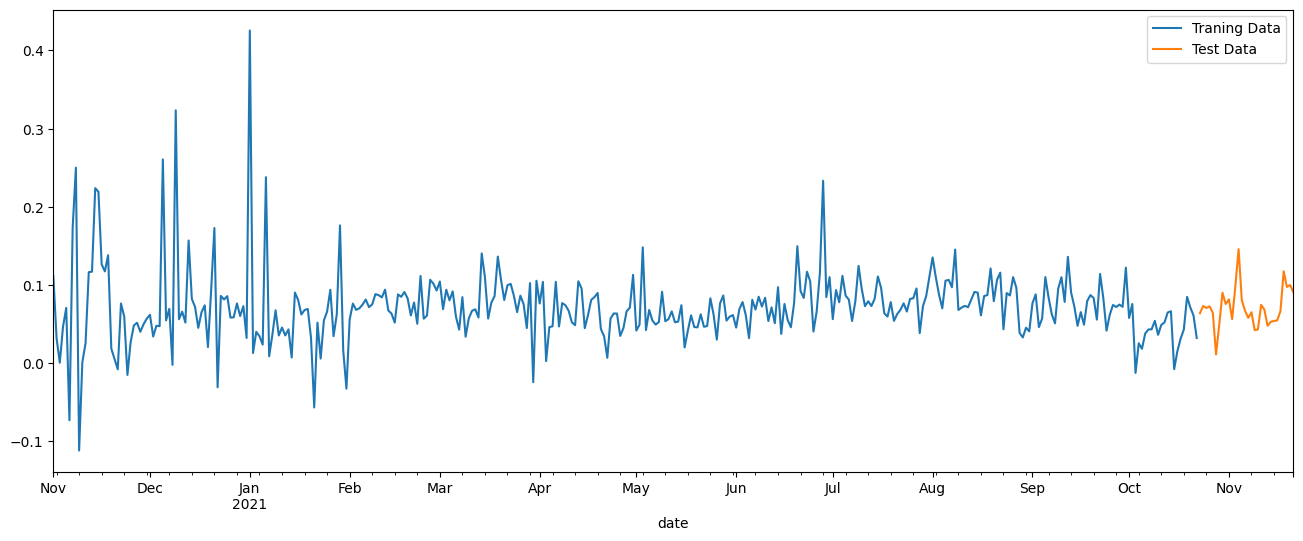

In [20]:

steps = 30
data_train = tsa_df[:-steps]
data_test = tsa_df[-steps:]



print(f"Training dates range from {data_train.index.min()} to {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates range from {data_test.index.min()} to {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(16, 6))
data_train['y'].plot(ax=ax, label='Traning Data')
data_test['y'].plot(ax=ax, label='Test Data')
ax.legend()
plt.show()

In [21]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=93),
                lags = 30
                )

forecaster.fit(y=data_train['y'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=93) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
Transformer for y: None 
Transformer for exog: None 
Window size: 30 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2020-11-01 00:00:00'), Timestamp('2021-10-22 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 93, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-05-26 09:22:34 
Last fit date: 2023-05-26 09:22:

In [57]:
steps = 30
tsa_predictions = forecaster.predict(steps=steps)
tsa_predictions.head(10)

2021-10-23    0.063721
2021-10-24    0.066800
2021-10-25    0.068835
2021-10-26    0.063440
2021-10-27    0.069305
2021-10-28    0.068922
2021-10-29    0.072061
2021-10-30    0.071710
2021-10-31    0.071048
2021-11-01    0.071586
Freq: D, Name: pred, dtype: float64

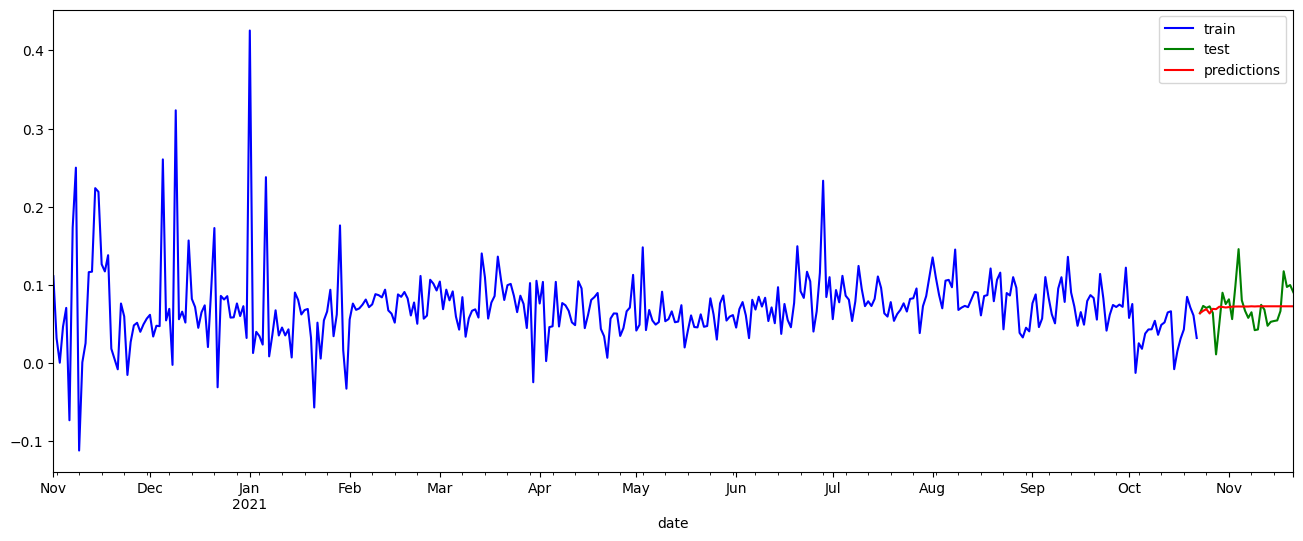

In [58]:
fig, ax = plt.subplots(figsize=(16, 6))
data_train['y'].plot(ax=ax, label='train', color='blue')
data_test['y'].plot(ax=ax, label='test', color='green')
tsa_predictions.plot(ax=ax, label='predictions', color='red')
ax.legend()


In [36]:
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = tsa_predictions
            )

print(f"Testing Mean Squared Error): {error_mse}")

Testing Mean Squared Error): 0.0006686670075266252


In [27]:
steps = 30
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 0.0009331352972437103



In [28]:
regressor = RandomForestRegressor(max_depth=5, n_estimators=500, random_state=87)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['y'])

In [31]:
tsa_tuned_predictions = forecaster.predict(steps=steps)

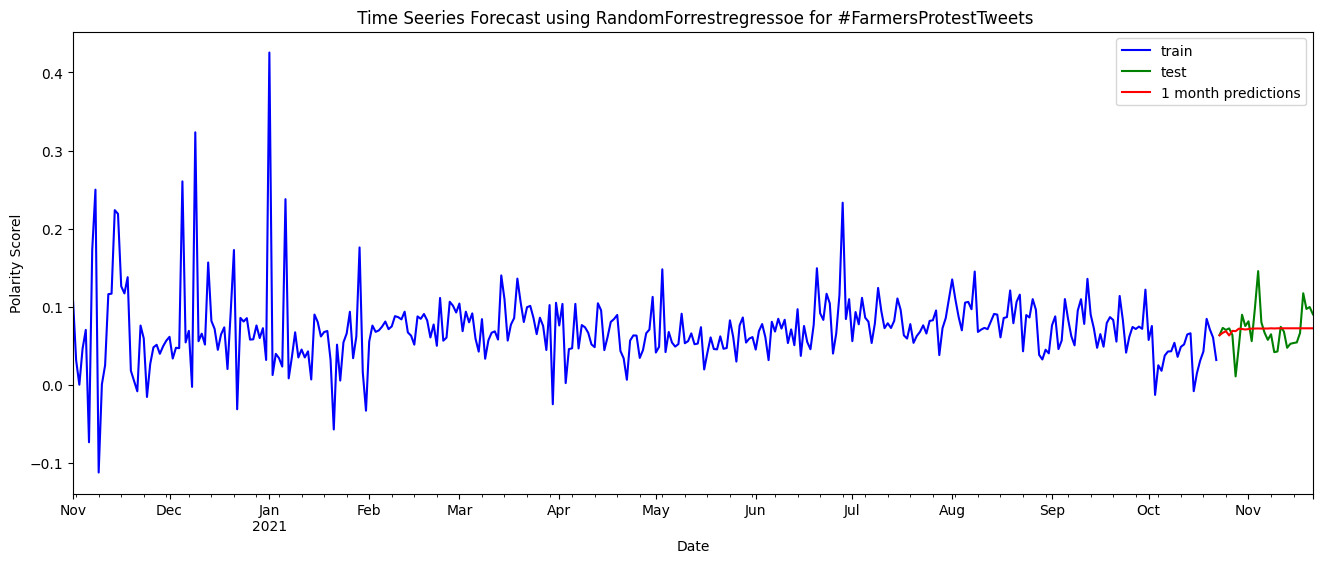

In [68]:
fig, ax = plt.subplots(figsize=(16, 6))
data_train['y'].plot(ax=ax, label='train', color='blue')
data_test['y'].plot(ax=ax, label='test', color='green')
tsa_tuned_predictions.plot(ax=ax, label='1 month predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Polarity Scorel')
plt.title(' Time Seeries Forecast using RandomForrestregressoe for #FarmersProtestTweets')
ax.legend()


plt.savefig('time_series_forecast_30_days.png', dpi=300)

In [35]:
mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = tsa_tuned_predictions
                )
print(f"Now we have tuned the data, our new value for MSE is below")
print(f"Mean Squared Error: {mse}")

Now we have tuned the data, our new value for MSE is below
Mean Squared Error: 0.0006130647588538597


In [37]:
steps7 = 7
steps365 = 365

In [39]:
tsa_tuned_predictions_7days = forecaster.predict(steps=steps7)

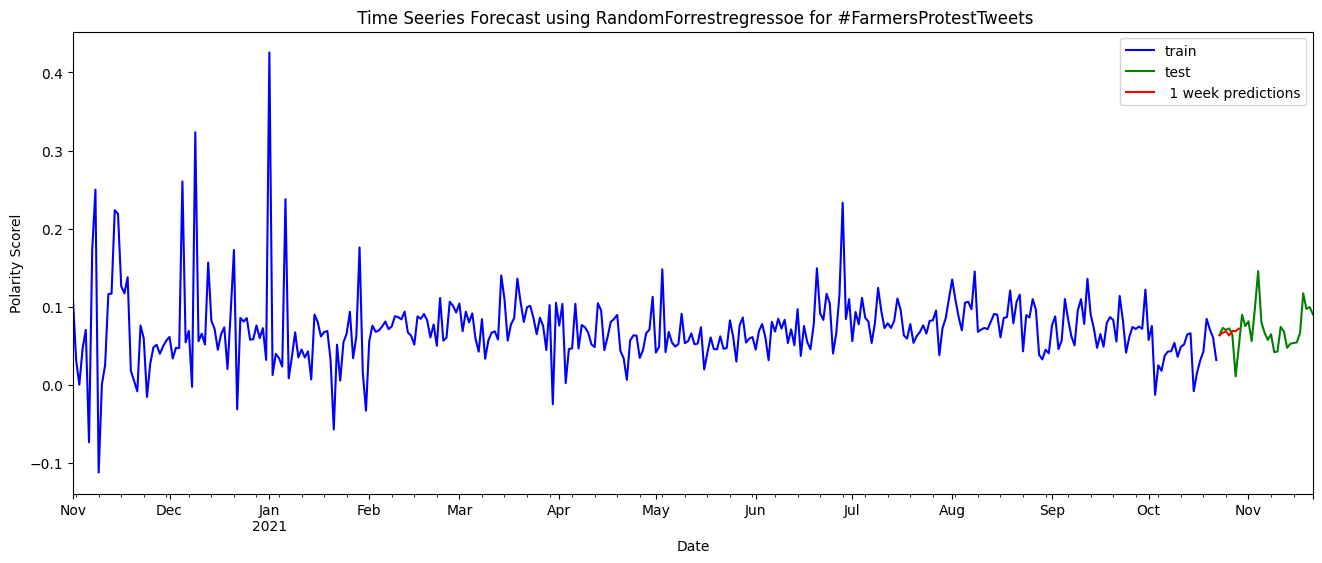

In [69]:
fig, ax = plt.subplots(figsize=(16, 6))
data_train['y'].plot(ax=ax, label='train', color='blue')
data_test['y'].plot(ax=ax, label='test', color='green')
tsa_tuned_predictions_7days.plot(ax=ax, label=' 1 week predictions', color='red')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Polarity Scorel')
plt.title(' Time Seeries Forecast using RandomForrestregressoe for #FarmersProtestTweets')
ax.legend()

plt.savefig('time_series_forecast_7_days.png', dpi=300)

In [41]:
tsa_tuned_predictions_365days = forecaster.predict(steps=steps365)

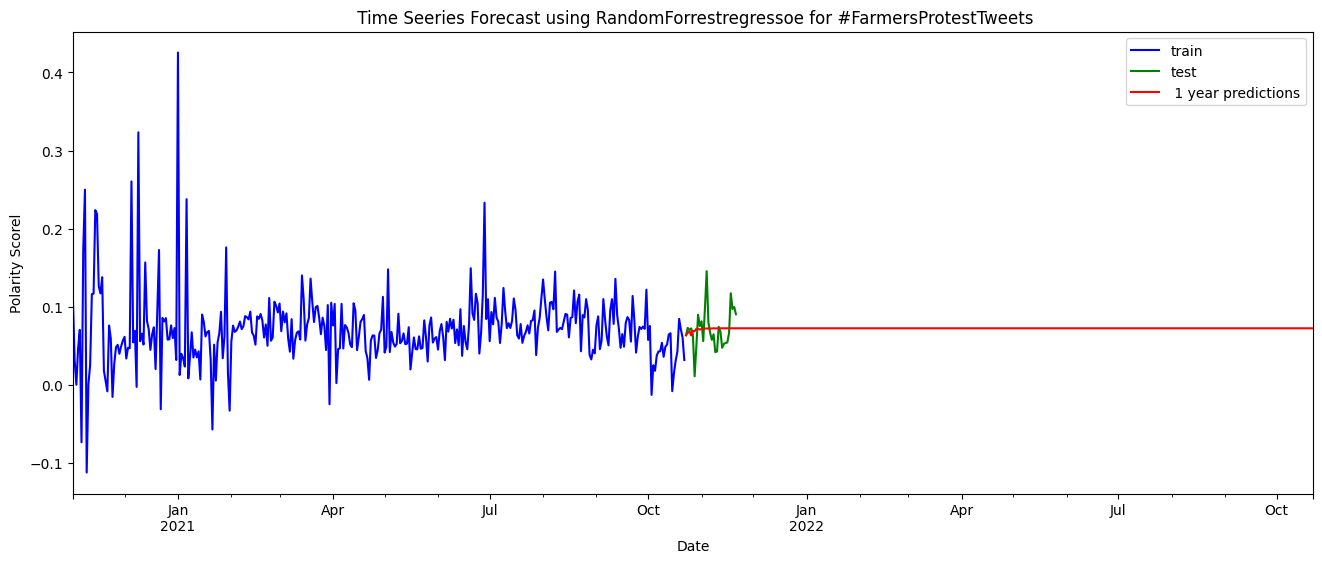

In [70]:
fig, ax = plt.subplots(figsize=(16, 6))
data_train['y'].plot(ax=ax, label='train', color='blue')
data_test['y'].plot(ax=ax, label='test', color='green')
tsa_tuned_predictions_365days.plot(ax=ax, label=' 1 year predictions', color='red')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Polarity Scorel')
plt.title(' Time Seeries Forecast using RandomForrestregressoe for #FarmersProtestTweets')
ax.legend()

plt.savefig('time_series_forecast_365_days.png', dpi=300)

In [43]:
tsa_df.tail()

y
date                
2021-11-17  0.066546
2021-11-18  0.117406
2021-11-19  0.097355
2021-11-20  0.099796
2021-11-21  0.090539

In [51]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

Here I quickly tried to do some more TSA using Arima when the results from Above didnt go to plan. I thnink if I had more time I would have investiagted seasonsal arima and librairies.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


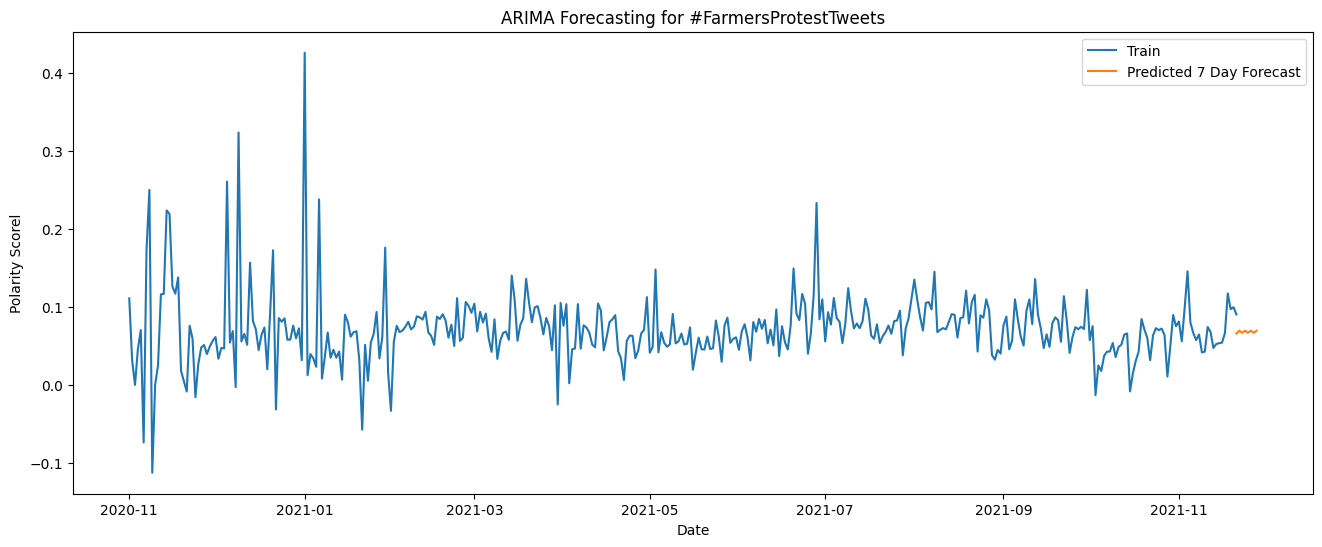

In [61]:

p = 1
d = 2
q = 3

model = ARIMA(tsa_df['y'], order=(p, d, q))
model_fit = model.fit()

# Forecast our 3 requirements in terms of days
forecast_7days = model_fit.predict(start=tsa_df.index[-1], end=tsa_df.index[-1] + pd.DateOffset(days=7))
forecast_30days = model_fit.predict(start=tsa_df.index[-1], end=tsa_df.index[-1] + pd.DateOffset(days=30))
forecast_365days = model_fit.predict(start=tsa_df.index[-1], end=tsa_df.index[-1] + pd.DateOffset(days=365))

plt.figure(figsize=(16, 6))
plt.plot(tsa_df.index, tsa_df['y'], label='Train')
plt.plot(forecast_7days.index, forecast_7days, label='Predicted 7 Day Forecast')
#plt.plot(forecast_30days.index, forecast_30days, label='Predicted 30 Day Forecast')
#plt.plot(forecast_365days.index, forecast_365days, label='Predicted 1 Year Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Polarity Scorel')
plt.title('ARIMA Forecasting for #FarmersProtestTweets')
plt.show()

# 5.0 Dashbaord

In [3]:
#pip install dash
#pip install dash-html-components

In [26]:
import dash
from dash import dcc
from dash import html

I tried multiple ports and restartiing kernel for a port issue error.

https://stackoverflow.com/questions/71200479/plotly-dash-zmqerror-address-already-in-use

In [21]:
tsa_images = [
    "time_series_forecast_30_days.png",
    "time_series_forecast_365_days.png",
    "time_series_forecast_7_days.png"
]

https://stackoverflow.com/questions/71263617/plotly-dash-image-does-not-displayed

In [ ]:
I also coulnt not get the images to show correctly at first. Article above showed me how to import base64, and encode the timages correctly

In [40]:
interactive_dashboard = dash.Dash(__name__)

interactive_dashboard.layout = html.Div([
    html.H1("sba22166's Interactive Dashboard", style={'text-align': 'center', 'color': 'black'}),
    html.H3("Time Series Analysis for Polarity Score Over Time for #FarmersProtestsTweets", style={'text-align': 'center'}),
    html.H4("Use the dropdown menu to toggle between the results", style={'text-align': 'center'}),
    dcc.Dropdown(
        id='image-dropdown',
        options=[
            {'label': '7 Day Forecast', 'value': 2},
            {'label': '30 Day Days Forecast', 'value': 0},
            {'label': '365 Days Forecast', 'value': 1}
        ],
        value=2
    ),
    html.Div(id='image-container', style={'text-align': 'center'})
])

@interactive_dashboard.callback(
    dash.dependencies.Output('image-container', 'children'),
    [dash.dependencies.Input('image-dropdown', 'value')]
)

def update_image(value):
    image_path = tsa_images[value]
    encoded_image = base64.b64encode(open(image_path, 'rb').read())
    return html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()), style={'width': '100%', 'height': 'auto'})


if __name__ == "__main__":
    interactive_dashboard.run_server(debug=True, port=8078, use_reloader=False)


Dash is running on http://127.0.0.1:8078/



INFO:dash.dash:Dash is running on http://127.0.0.1:8078/



 * Serving Flask app '__main__'
 * Debug mode: on


Address already in use
Port 8078 is in use by another program. Either identify and stop that program, or start the server with a different port.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/hduser/.local/lib/python3.10/site-packages/werkzeug/serving.py", line 911, in prepare_socket
    s.bind(server_address)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_11576/1775551933.py", line 31, in <module>
    interactive_dashboard.run_server(debug=True, port=8078, use_reloader=False)
  File "/home/hduser/.local/lib/python3.10/site-packages/dash/dash.py", line 2047, in run_server
    self.run(*args, **kwargs)
  File "/home/hduser/.local/lib/python3.10/site-packages/dash/dash.py", line 1955, in run
    self.server.run(host=host, port=port, debug=debug, **flask_run_options)
  File "/home/hduser/.local/lib/python3.10/site-packages/flask/app.py", line 1188, in run
   

TypeError: object of type 'NoneType' has no len()